<a href="https://colab.research.google.com/github/massilva/bootcamps-dio-bairesdev-machine-learning-training-confusion-matrix/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu==2.0.0-beta1

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1


In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.19.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8906 - loss: 0.3569 - val_accuracy: 0.9848 - val_loss: 0.0493
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9867 - val_loss: 0.0477
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9886 - loss: 0.0352 - val_accuracy: 0.9916 - val_loss: 0.0271
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9923 - loss: 0.0245 - val_accuracy: 0.9914 - val_loss: 0.0263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9919 - val_loss: 0.0282


In [10]:
y_true=test_labels
# DEPRECATED: y_pred=model.predict_classes(test_images)
y_pred=np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

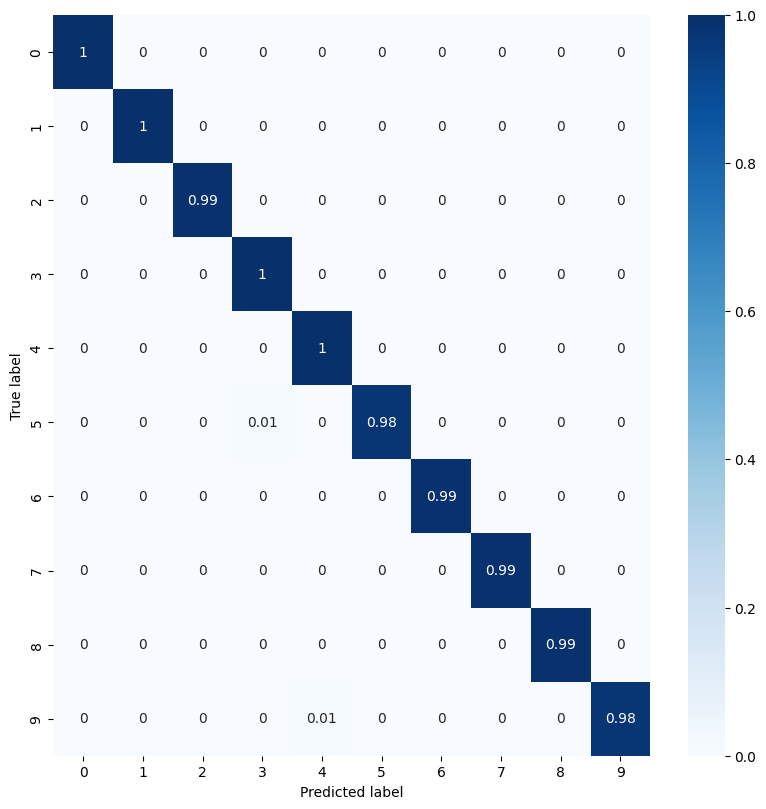

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
import keras
import io

file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  # DEPRECATED: test_pred = model1.predict_classes(test_images)
  test_pred=np.argmax(model1.predict(test_images), axis=-1)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [15]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Start TensorBoard.
#%tensorboard --logdir logs/images

## Cálculo de Métricas de Avaliação de Aprendizado

In [17]:
con_mat

array([[ 978,    1,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1133,    0,    1,    0,    0,    0,    1,    0,    0],
       [   2,    1, 1023,    1,    1,    0,    0,    4,    0,    0],
       [   0,    0,    1, 1005,    0,    1,    0,    2,    1,    0],
       [   0,    1,    0,    0,  979,    0,    0,    0,    0,    2],
       [   2,    0,    0,   13,    0,  874,    1,    1,    0,    1],
       [   2,    2,    0,    0,    1,    1,  952,    0,    0,    0],
       [   0,    3,    2,    0,    0,    0,    0, 1020,    0,    3],
       [   2,    0,    0,    3,    0,    0,    0,    1,  967,    1],
       [   0,    1,    1,    0,    7,    4,    0,    5,    3,  988]],
      dtype=int32)

In [18]:
y_true

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
"""
FÓRMULAS:

Sensibilidade: 	VP / (VP + FN)
Especificidade: 	VN / (VN + FP)
Acurácia: 	(VP + VN) / (VP + VN + FP + FN)
Precisão: 	VP / (VP + FP)
F-score: 	2 * PxS / (P + S)

ENTENDIMENTO:

VP (Verdadeiros Positivos): modelo previu positivo e era realmente positivo
VN (Verdadeiros Negativos): modelo previu negativo e era realmente negativo
FP (Falsos Positivos): modelo previu positivo, mas era negativo
FN (Falsos Negativos): modelo previu negativo, mas era positivo
"""
VP, VN, FP, FN = 0,0,0,0

for i in range(len(y_true)):
  if y_true[i] == y_pred[i]:
    if y_true[i] == 1:
      VP += 1
    else:
      VN += 1
  else:
    if y_pred[i] == 1:
      FP += 1
    else:
      FN += 1

(VP, VN, FP, FN)

(1133, 8786, 9, 72)

In [21]:
sensibilidade = VP / (VP + FN)
sensibilidade

0.9402489626556016

In [22]:
especificidade = VN / (VN + FP)
especificidade

0.998976691301876

In [23]:
acuracia = (VP + VN) / (VP + VN + FP + FN)
acuracia

0.9919

In [24]:
precisao = VP / (VP + FP)
precisao

0.9921190893169878

In [25]:
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
f_score

0.9654878568385172

In [26]:
print("SUMÁRIO")
print("\n---\n")
print(f"VP: {VP}")
print(f"VN: {VN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print("\n---\n")
print(f"Sensibilidade: {sensibilidade:.4f} ({sensibilidade * 100.0:.2f}%)")
print(f"Especificidade: {especificidade:.4f} ({especificidade * 100.0:.2f}%)")
print(f"Acurácia: {acuracia:.4f} ({acuracia * 100.0:.2f}%)")
print(f"Precisão: {precisao:.4f} ({precisao * 100.0:.2f}%)")
print(f"F-score: {f_score:.4f} ({f_score * 100.0:.2f}%)")

SUMÁRIO

---

VP: 1133
VN: 8786
FP: 9
FN: 72

---

Sensibilidade: 0.9402 (94.02%)
Especificidade: 0.9990 (99.90%)
Acurácia: 0.9919 (99.19%)
Precisão: 0.9921 (99.21%)
F-score: 0.9655 (96.55%)
